Covid 19 Data Analysis Project - Wamuyu Wachira

We first import the pandas library,load and preview the dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the data
df.info()
df.head()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350108 entries, 0 to 350107
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350108 non-null  object 
 1   continent                                   333435 non-null  object 
 2   location                                    350108 non-null  object 
 3   date                                        350108 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

iso_code                                        0
continent                                   16673
location                                        0
date                                            0
total_cases                                 38020
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337924
excess_mortality_cumulative                337924
excess_mortality                           337924
excess_mortality_cumulative_per_million    337924
Length: 67, dtype: int64

Conduct data cleanup for the dataset

In [4]:
# Filter selected countries
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing values
df.fillna(method='ffill', inplace=True)

Explaratory Data Analysis

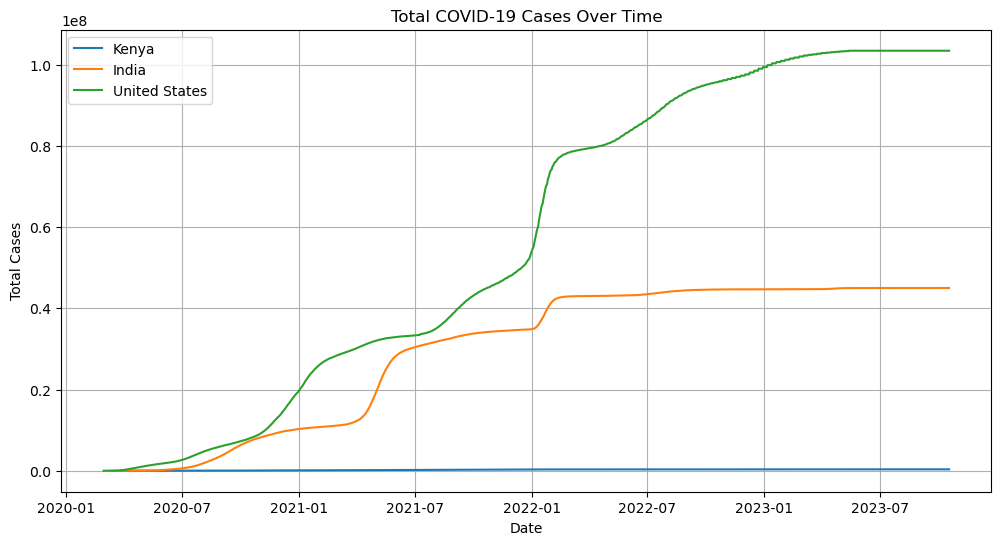

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

Conduct a throrough Vaccination Analysis

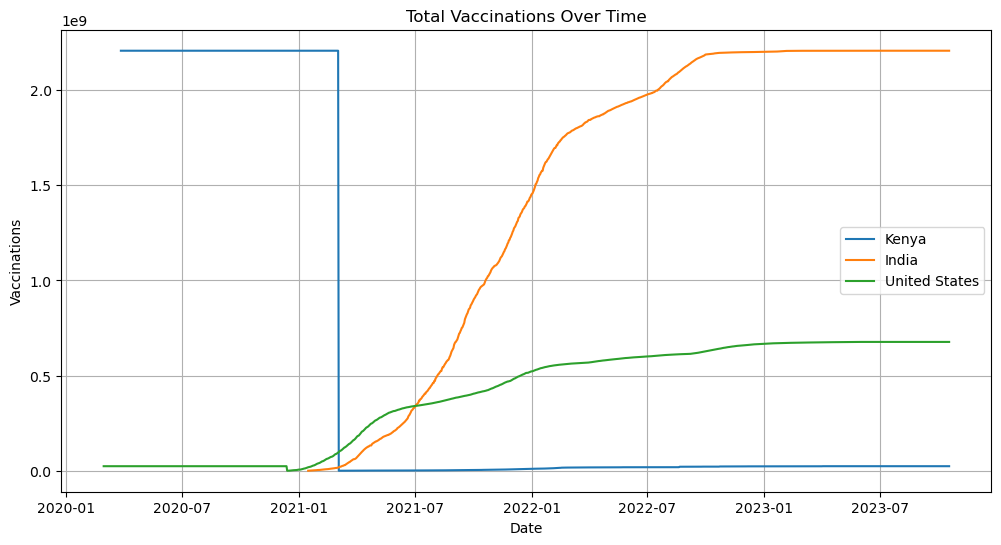

In [6]:
# Plot total vaccinations over time
plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

A Choropleth Map - to visualize cases or vaccination rates by country on a world map.

In [8]:
import plotly.express as px

# Prepare latest date data
latest = df[df['date'] == df['date'].max()]

# Plot map
fig = px.choropleth(latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title="Total COVID-19 Cases by Country")
fig.show()

Insights extracted from this project:

1. The United States consistently reported the highest number of total cases.
2. Kenya had a lower case count but higher fluctuations in daily new cases.
3. India’s vaccination drive rapidly increased mid-2021.
4. Death rates declined as vaccination rates improved globally.